<a href="https://colab.research.google.com/github/pDavidm/RestAPI/blob/master/Project_01_food_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [3]:
filename = '/content/drive/MyDrive/Data Science Class/week7 19/sales_predictions.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#checking for duplicates
df.duplicated().any()

False

In [6]:
#checking data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#checking for spelling errors in the object field
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
#fixing errors
Low_Fat = (df['Item_Fat_Content'] == 'LF') | (df['Item_Fat_Content'] == 'low fat') | (df['Item_Fat_Content'] == 'Low Fat')
df['Item_Fat_Content'] = np.where(Low_Fat, 'Low Fat', 'Regular')

In [9]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [11]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [14]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [15]:
# checking for null values
df.isnull().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
#looking at max, min, and mean values of Item_Weight
df.groupby('Item_Type')[['Item_Weight']].max()

,Item_Weight
Item_Type,
Baking Goods,20.85
Breads,20.85
Breakfast,21.10
Canned,21.35
Dairy,20.70
Frozen Foods,20.85
Fruits and Vegetables,21.35
Hard Drinks,19.70
Health and Hygiene,21.25


In [17]:
df.groupby('Item_Type')[['Item_Weight']].min()

,Item_Weight
Item_Type,
Baking Goods,4.880
Breads,4.635
Breakfast,6.425
Canned,4.615
Dairy,4.805
Frozen Foods,4.555
Fruits and Vegetables,5.460
Hard Drinks,4.610
Health and Hygiene,5.175


In [18]:
df.groupby('Item_Type')[['Item_Weight']].mean()

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [19]:
#setting the missing values of 'Item_Weight' to the mean value of entry's 'Item_Type
df["Item_Weight"] = df.groupby("Item_Type").transform(lambda x: x.fillna(x.mean())) 

In [20]:
df.isnull().sum() 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
#looking at missing data in Outlet Size
missing = df['Outlet_Size'].isna()
df[missing].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [22]:
#seeing if there is any store ids that have entries with null and non-null values
df[missing].Outlet_Identifier.unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [23]:
out1 = (df['Outlet_Identifier'] == 'OUT010') & (df['Outlet_Size'].notnull())
df[out1]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [24]:
out2 = (df['Outlet_Identifier'] == 'OUT045') & (df['Outlet_Size'].notnull())
df[out2]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [25]:
out3 = (df['Outlet_Identifier'] == 'OUT017') & (df['Outlet_Size'].notnull())
df[out3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [26]:
#since the missing values seem tied to specific stores and with no way to know the stores size it might be best to just create an 'unknown' or 'missing' value for the outlet_size 
df[['Outlet_Size']] = df[['Outlet_Size']].fillna('Missing')

In [27]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
corr = df.corr()

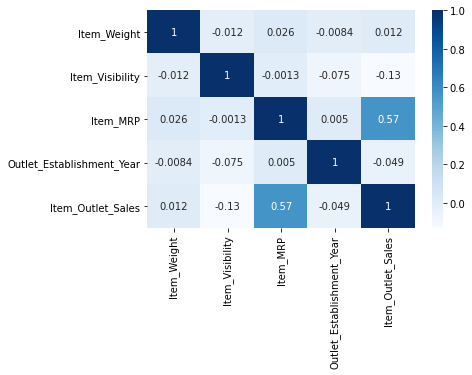

In [29]:
sns.heatmap(corr, cmap = 'Blues', annot=True);
# there looks to be a moderate positive corralation between Item_MRP and Item_Outlet_Sales

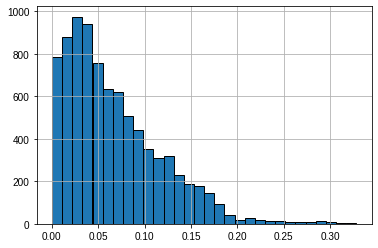

In [30]:
df['Item_Visibility'].hist(bins = 30, edgecolor='black'); #skews to the left. Most entries seem to have visability below %10
plt.style.use('seaborn')
plt.ticklabel_format(useOffset=False, style='plain')

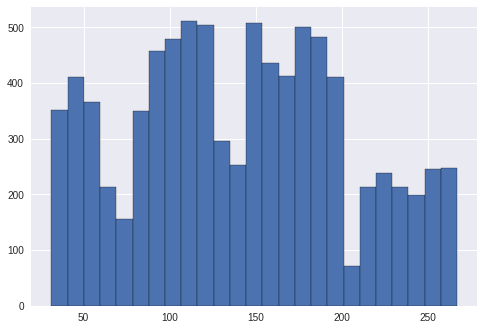

In [31]:
df['Item_MRP'].hist(bins = 25, edgecolor='black'); 
plt.style.use('seaborn')
plt.ticklabel_format(useOffset=False, style='plain')

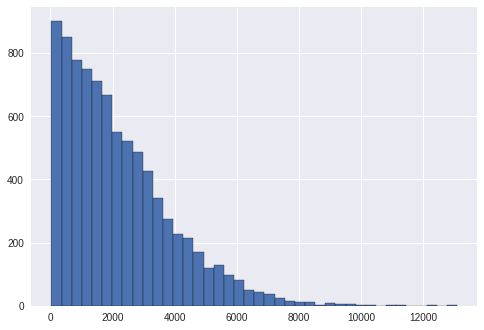

In [32]:
df['Item_Outlet_Sales'].hist(bins = 40, edgecolor='black'); #skews left. most entires seems to be bellow 4000
plt.style.use('seaborn')
plt.ticklabel_format(useOffset=False, style='plain')

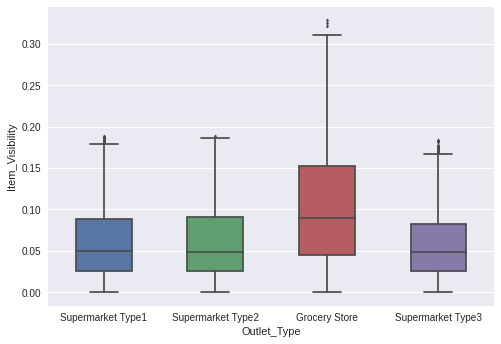

In [33]:
sns.boxplot(x='Outlet_Type', y='Item_Visibility', data=df, fliersize=2, width=0.5);


Text(0.5, 1.0, 'Item Sales by Fat Content')

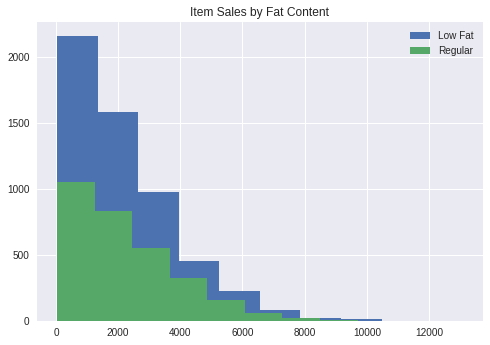

In [41]:
low = df.loc[df.Item_Fat_Content == 'Low Fat', 'Item_Outlet_Sales']
reg = df.loc[df.Item_Fat_Content == 'Regular', 'Item_Outlet_Sales']
plt.hist(low, label='Low Fat');
plt.hist(reg, label="Regular");
plt.legend();
plt.title('Item Sales by Fat Content')

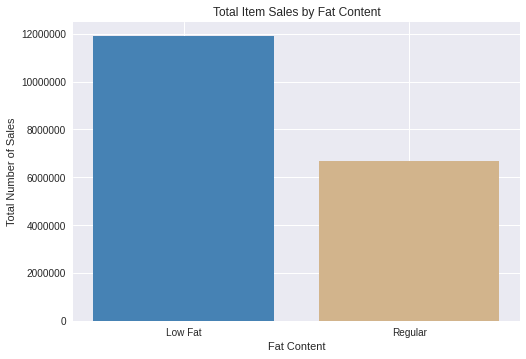

In [68]:
ax = plt.axes()
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Total Item Sales by Fat Content')
plt.xlabel('Fat Content')
plt.ylabel('Total Number of Sales')
low = df.loc[df.Item_Fat_Content == 'Low Fat', 'Item_Outlet_Sales'].sum()
reg = df.loc[df.Item_Fat_Content == 'Regular', 'Item_Outlet_Sales'].sum()
plt.bar(['Low Fat', 'Regular'], [low, reg], color = ['steelblue', 'tan']);


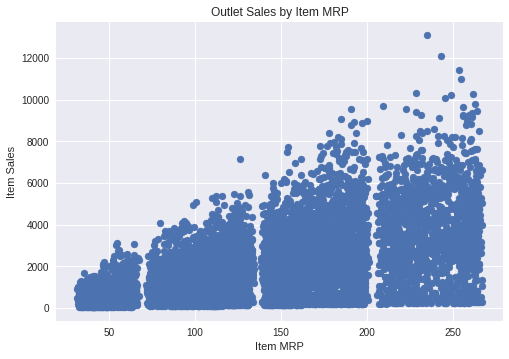

In [70]:
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales']);
plt.title('Outlet Sales by Item MRP');
plt.xlabel('Item MRP');
plt.ylabel('Item Sales');